In [1]:
import math
import numpy as np
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt
import librosa
import librosa.display
import os
import re
import pandas as pd
import random
from scipy.interpolate import interp1d

C:\Users\ljr\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
path= r"C:\LJR\yukie lab\conferences\ircn pr\2024"

In [3]:
i1,sr1=librosa.load(path+"\\"+'i1.wav',sr=None)
i2,sr2=librosa.load(path+"\\"+'i2.wav',sr=None)
i3,sr3=librosa.load(path+"\\"+'i3.wav',sr=None)
m1,sr1=librosa.load(path+"\\"+'m1.wav',sr=None)
m2,sr1=librosa.load(path+"\\"+'m2.wav',sr=None)
m3,sr1=librosa.load(path+"\\"+'m3.wav',sr=None)
o1,sr1=librosa.load(path+"\\"+'o1.wav',sr=None)
o2,sr1=librosa.load(path+"\\"+'o2.wav',sr=None)

In [4]:
def normalizea(x,maxa,mina, axis=0):
    return [(float(i)-mina)/float(maxa-mina) for i in x]

In [5]:
def f0fitintera(files,maxa,mina,srin):
    x=files
    sr1=srin
    #x,sr1=librosa.load(path+"\\"+files,sr=None)
    f0, voiced_flag, voiced_probs = librosa.pyin(x,sr=sr1,frame_length=512, fill_na=np.nan, n_thresholds=50, fmin=120, fmax=500)
    times = librosa.times_like(f0,sr=sr1,hop_length=128)
    duration=librosa.get_duration(y=x, sr=sr1)
    #for k in range(len(f0)-1):
        #if (k!=0):
            #if (np.isnan(f0[k-1]))and(np.isnan(f0[k+1])):
                #f0[k]=np.nan
        #if (~np.isnan(f0[-1]))and(np.isnan(f0[-2])):
            #f0[-1]=np.nan
    #logf0=np.log(f0)
    #logf0nomal=f0
    logf0nomal=normalizea(f0,maxa,mina)
    timesp=pd.DataFrame(times)
    logf0nomalp=pd.DataFrame(logf0nomal)
    indxnan = logf0nomalp.fillna(method='ffill').dropna().index
    res_idx = logf0nomalp.loc[indxnan].fillna(method='bfill').dropna().index
    f0out=logf0nomalp.loc[res_idx]
    timesout = timesp.loc[res_idx]
    timesout=timesout-timesout.min()
    timesnumpy=timesout.to_numpy()
    f0outnumpy=f0out.to_numpy()
    logf0nomalnan = f0outnumpy[~np.isnan(f0outnumpy)]
    timesnan = timesnumpy[~np.isnan(f0outnumpy)]
    #xx = np.linspace(timesnumpy.min(), timesnumpy.max(), 50) 
    f = interp1d(timesnan, logf0nomalnan,kind='slinear',fill_value="extrapolate")
    ynew=f(timesnumpy)
    #ynew=f(xx)
    return f0, ynew

In [6]:
def f0fitinteri(files,maxa,mina,srin):
    x=files
    sr1=srin
    #x,sr1=librosa.load(path+"\\"+files,sr=None)
    f0, voiced_flag, voiced_probs = librosa.pyin(x,sr=sr1,frame_length=512, fill_na=np.nan, n_thresholds=50, fmin=250, fmax=900)
    times = librosa.times_like(f0,sr=sr1,hop_length=128)
    duration=librosa.get_duration(y=x, sr=sr1)
    #for k in range(len(f0)-1):
        #if (k!=0):
            #if (np.isnan(f0[k-1]))and(np.isnan(f0[k+1])):
                #f0[k]=np.nan
        #if (~np.isnan(f0[-1]))and(np.isnan(f0[-2])):
            #f0[-1]=np.nan
    #logf0=np.log(f0)
    #logf0nomal=f0
    logf0nomal=normalizea(f0,maxa,mina)
    timesp=pd.DataFrame(times)
    logf0nomalp=pd.DataFrame(logf0nomal)
    indxnan = logf0nomalp.fillna(method='ffill').dropna().index
    res_idx = logf0nomalp.loc[indxnan].fillna(method='bfill').dropna().index
    f0out=logf0nomalp.loc[res_idx]
    timesout = timesp.loc[res_idx]
    timesout=timesout-timesout.min()
    timesnumpy=timesout.to_numpy()
    f0outnumpy=f0out.to_numpy()
    logf0nomalnan = f0outnumpy[~np.isnan(f0outnumpy)]
    timesnan = timesnumpy[~np.isnan(f0outnumpy)]
    #xx = np.linspace(timesnumpy.min(), timesnumpy.max(), 50) 
    f = interp1d(timesnan, logf0nomalnan,kind='slinear',fill_value="extrapolate")
    ynew=f(timesnumpy)
    #ynew=f(xx)
    return f0,ynew

In [7]:
f0i1, ynewi1=f0fitinteri(i1,900,250,sr1)
f0i2, ynewi2=f0fitinteri(i2,900,250,sr2)
f0i3, ynewi3=f0fitinteri(i3,900,250,sr3)

In [8]:
f0m1, ynewm1=f0fitintera(m1,500,120,sr1)
f0m2, ynewm2=f0fitintera(m2,500,120,sr2)
f0m3, ynewm3=f0fitintera(m3,500,120,sr3)

In [9]:
f0o1, ynewo1=f0fitintera(o1,500,120,sr1)
f0o2, ynewo2=f0fitintera(o2,500,120,sr2)

f0oi1, ynewoi1=f0fitinteri(o1,500,120,sr1)
f0oi2, ynewoi2=f0fitinteri(o2,500,120,sr2)

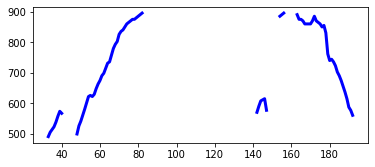

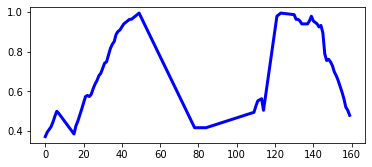

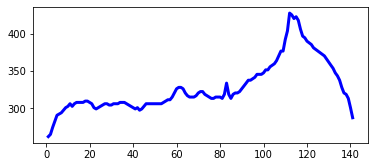

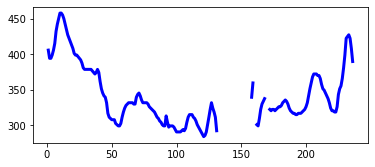

In [10]:
plt.figure(figsize=(6, 2.5))
plt.plot(np.arange(len(f0i1)),f0i1,lw=3,color='Blue')
#plt.axis('off')
plt.show()

plt.figure(figsize=(6, 2.5))
plt.plot(np.arange(len(ynewi1)),ynewi1,lw=3,color='Blue')
#plt.axis('off')
plt.show()

plt.figure(figsize=(6, 2.5))
plt.plot(np.arange(len(f0i2)),f0i2,lw=3,color='Blue')
#plt.axis('off')
plt.show()

plt.figure(figsize=(6, 2.5))
plt.plot(np.arange(len(f0i3)),f0i3,lw=3,color='Blue')
#plt.axis('off')
plt.show()

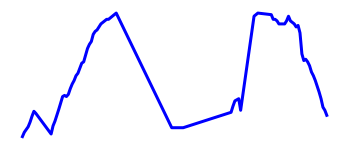

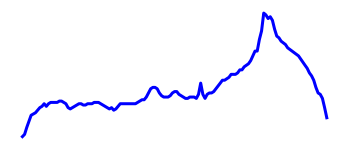

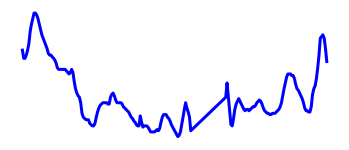

In [11]:
plt.figure(figsize=(6, 2.5))
plt.plot(ynewi1,lw=3,color='Blue')
plt.axis('off')
plt.show()

plt.figure(figsize=(6, 2.5))
plt.plot(ynewi2,lw=3,color='Blue')
plt.axis('off')
plt.show()

plt.figure(figsize=(6, 2.5))
plt.plot(ynewi3,lw=3,color='Blue')
plt.axis('off')
plt.show()

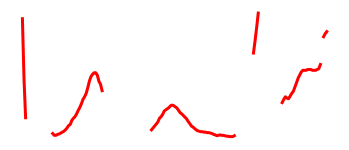

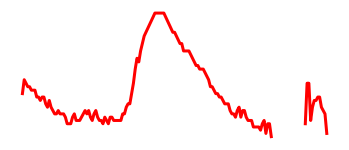

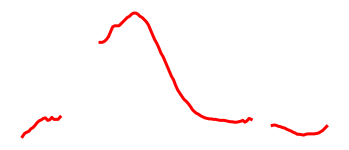

In [12]:
plt.figure(figsize=(6, 2.5))
plt.plot(f0m1,lw=3,color='red')
plt.axis('off')
plt.show()

plt.figure(figsize=(6, 2.5))
plt.plot(f0m2,lw=3,color='red')
plt.axis('off')
plt.show()

plt.figure(figsize=(6, 2.5))
plt.plot(f0m3,lw=3,color='red')
plt.axis('off')
plt.show()

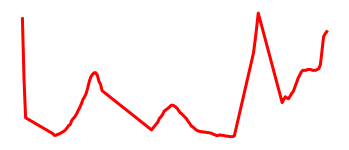

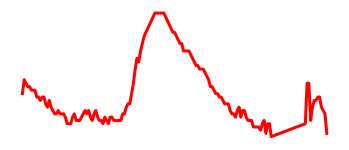

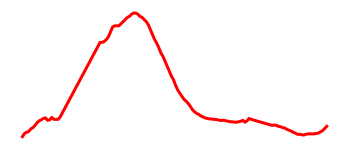

In [13]:
plt.figure(figsize=(6, 2.5))
plt.plot(np.arange(len(ynewm1)),ynewm1,lw=3,color='red')
plt.axis('off')
plt.show()

plt.figure(figsize=(6, 2.5))
plt.plot(np.arange(len(ynewm2)),ynewm2,lw=3,color='red')
plt.axis('off')
plt.show()

plt.figure(figsize=(6, 2.5))
plt.plot(np.arange(len(ynewm3)),ynewm3,lw=3,color='red')
plt.axis('off')
plt.show()

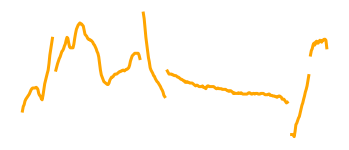

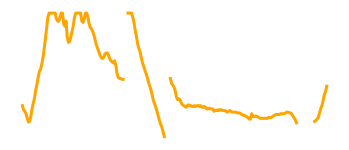

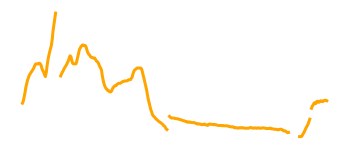

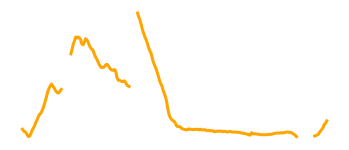

In [14]:
plt.figure(figsize=(6, 2.5))
plt.plot(f0o1,lw=3,color='orange')
plt.axis('off')
plt.show()

plt.figure(figsize=(6, 2.5))
plt.plot(f0o2,lw=3,color='orange')
plt.axis('off')
plt.show()

plt.figure(figsize=(6, 2.5))
plt.plot(f0oi1,lw=3,color='orange')
plt.axis('off')
plt.show()

plt.figure(figsize=(6, 2.5))
plt.plot(f0oi2,lw=3,color='orange')
plt.axis('off')
plt.show()

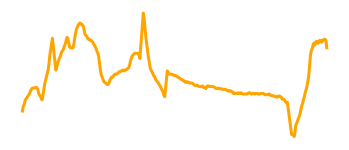

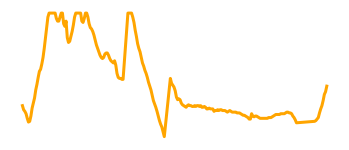

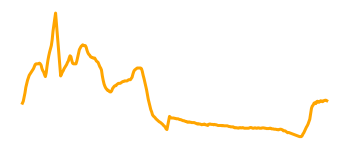

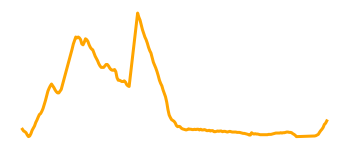

In [15]:
plt.figure(figsize=(6, 2.5))
plt.plot(ynewo1,lw=3,color='orange')
plt.axis('off')
plt.show()

plt.figure(figsize=(6, 2.5))
plt.plot(ynewo2,lw=3,color='orange')
plt.axis('off')
plt.show()

plt.figure(figsize=(6, 2.5))
plt.plot(ynewoi1,lw=3,color='orange')
plt.axis('off')
plt.show()

plt.figure(figsize=(6, 2.5))
plt.plot(ynewoi2,lw=3,color='orange')
plt.axis('off')
plt.show()